In [20]:
df = pd.read_csv('house_prices.csv')
df.head()


,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [21]:
df['Carpet Area'] = df['Carpet Area'].astype(str)
df['Carpet Area'] = df['Carpet Area'].str.replace('sqft','', case=False)
df['Carpet Area'] = df['Carpet Area'].str.replace('sq ft','', case=False)
df['Carpet Area'] = df['Carpet Area'].str.strip()

df['Carpet Area'] = pd.to_numeric(df['Carpet Area'], errors='coerce')

df = df.dropna(subset=['Carpet Area'])


In [23]:
# Price clean
df['Price (in rupees)'] = df['Price (in rupees)'].astype(str)

# Lac ko 100000 se multiply
df['Price (in rupees)'] = df['Price (in rupees)'].str.replace('Lac','00000', case=False)

# Cr ko 10000000 se multiply
df['Price (in rupees)'] = df['Price (in rupees)'].str.replace('Cr','0000000', case=False)

# commas remove
df['Price (in rupees)'] = df['Price (in rupees)'].str.replace(',','')

# numeric convert
df['Price (in rupees)'] = pd.to_numeric(df['Price (in rupees)'], errors='coerce')

# NaN remove
df = df.dropna(subset=['Price (in rupees)'])


In [24]:
from sklearn.linear_model import LinearRegression

X = df[['Carpet Area']]
y = df['Price (in rupees)']

model = LinearRegression()
model.fit(X, y)

print("Model trained successfully")


Model trained successfully


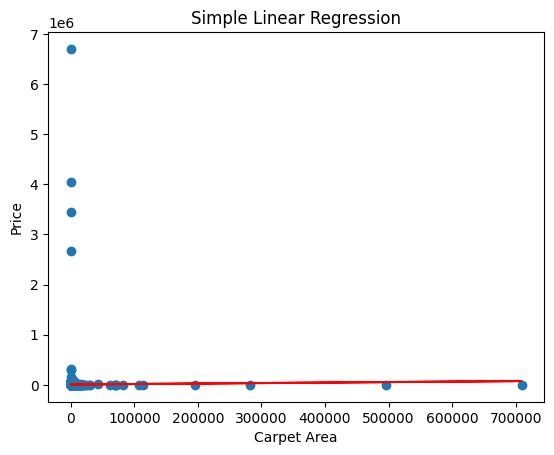

In [25]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.xlabel("Carpet Area")
plt.ylabel("Price")
plt.title("Simple Linear Regression")
plt.show()


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 88348 entries, 0 to 187528
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              88348 non-null  int64  
 1   Title              88348 non-null  object 
 2   Description        88073 non-null  object 
 3   Amount(in rupees)  88348 non-null  object 
 4   Price (in rupees)  88348 non-null  float64
 5   location           88348 non-null  object 
 6   Carpet Area        88348 non-null  float64
 7   Status             88275 non-null  object 
 8   Floor              86259 non-null  object 
 9   Transaction        88345 non-null  object 
 10  Furnishing         88325 non-null  object 
 11  facing             73045 non-null  object 
 12  overlooking        67137 non-null  object 
 13  Society            45551 non-null  object 
 14  Bathroom           88332 non-null  object 
 15  Balcony            83618 non-null  object 
 16  Car Parking        54521 n

In [28]:
df['Floor'] = df['Floor'].astype(str)
df['Floor'] = df['Floor'].str.extract(r'(\d+)')
df['Floor'] = pd.to_numeric(df['Floor'], errors='coerce')



In [29]:
df['Bathroom'] = pd.to_numeric(df['Bathroom'], errors='coerce')


In [30]:
df_multi = df[['Carpet Area','Floor','Bathroom','Price (in rupees)']].dropna()
df_multi = df_multi.reset_index(drop=True)

df_multi.head()


,Carpet Area,Floor,Bathroom,Price (in rupees)
0,500.0,10.0,1.0,6000.0
1,473.0,3.0,2.0,13799.0
2,779.0,10.0,2.0,17500.0
3,635.0,20.0,2.0,18824.0
4,550.0,4.0,1.0,2538.0


In [31]:
from sklearn.linear_model import LinearRegression

X = df_multi[['Carpet Area','Floor','Bathroom']]
y = df_multi['Price (in rupees)']

model_multi = LinearRegression()
model_multi.fit(X, y)

print("Multiple Regression Done")


Multiple Regression Done


In [32]:
from sklearn.preprocessing import PolynomialFeatures


In [33]:
poly = PolynomialFeatures(degree=2)   # curve banega
X_poly = poly.fit_transform(df_multi[['Carpet Area']])


In [34]:
model_poly = LinearRegression()
model_poly.fit(X_poly, df_multi['Price (in rupees)'])

print("Polynomial Regression Done")


Polynomial Regression Done


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


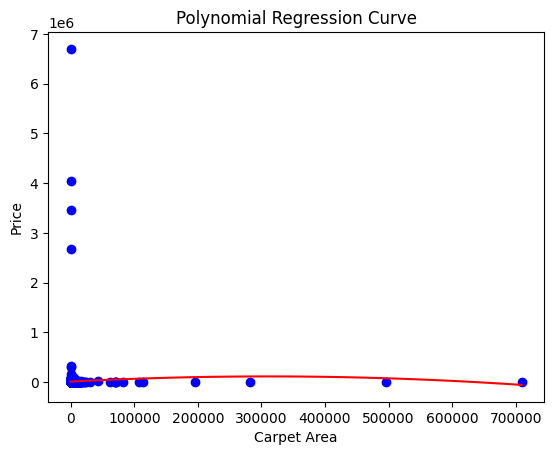

In [35]:
import numpy as np
import matplotlib.pyplot as plt

X = df_multi[['Carpet Area']].values
y = df_multi['Price (in rupees)'].values

plt.scatter(X, y, color='blue')

# smooth curve ke liye sorted values
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
X_range_poly = poly.transform(X_range)
y_poly = model_poly.predict(X_range_poly)

plt.plot(X_range, y_poly, color='red')
plt.title("Polynomial Regression Curve")
plt.xlabel("Carpet Area")
plt.ylabel("Price")
plt.show()


In [36]:
from sklearn.linear_model import Ridge

X = df_multi[['Carpet Area','Floor','Bathroom']]
y = df_multi['Price (in rupees)']

ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

print("Ridge Done")


Ridge Done


In [37]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

print("Lasso Done")


Lasso Done


In [38]:
print("Linear Coef:", model_multi.coef_)
print("Ridge Coef:", ridge.coef_)
print("Lasso Coef:", lasso.coef_)


Linear Coef: [5.97639075e-04 1.38815922e+02 2.04966152e+03]
Ridge Coef: [5.98945539e-04 1.38817137e+02 2.04962904e+03]
Lasso Coef: [6.03154181e-04 1.38817190e+02 2.04952989e+03]


In [39]:
pred_multi = model_multi.predict(X)
residuals = y - pred_multi


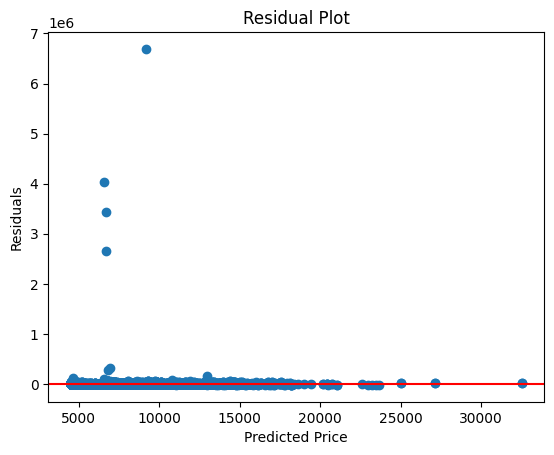

In [40]:
import matplotlib.pyplot as plt

plt.scatter(pred_multi, residuals)
plt.axhline(y=0, color='red')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
